# Cleaning and Analyzing Employee Exit Surveys of the DETE and TAFE Institutes in Queensland, Australia

## Introduction

In this project, we'll be working with exit surveys from employees of the [Department of Education, Training, and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), while the original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

Here we'll be acting as a data analyst. Our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for *both* surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. This project will give us the opportunity to practice our newly learned tools for data cleaning and transformation.

## Getting Started

We're going to start by reading the datasets in pandas and exploring them.

In [2]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Examine DETE survey first
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
pd.options.display.max_columns = 150 # to avoid truncated output
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


A data dictionary has not been provided with either dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

The relevant columns we'll be working with from `dete_survey` are:

- `ID`: A number used to identify the survey participant
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or the month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

And the relevant columns from `tafe_survey` are:

- `Record ID`: A number used to identify the survey participant
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment in years

Here are several preliminary observations:

- The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and the `tafe_survey` contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identifying Missing Values and Dropping Unnecessary Columns

To address the first bullet point, we can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to fix the missing values first. Then, we'll drop columns we know we won't need for our analysis.

In [7]:
# Read the `dete_survey.csv` file into pandas again
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


After we rectified the missing values, we had to make a decision about which columns to drop, if any. Both institutes, in their employee exit surveys, offered questionnaires, with each question getting its own column in the datasets. While the information may be interesting or useful for other assignments, that is not the case for our project.

There are many questions, and upon looking at each dataset, the questionnaire portion takes up 38% of the columns in `dete_survey` and 68% of the columns in `tafe_survey`. After dropping these columns, the datasets become much less bulky.

## Cleaning Column Names

Now let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below we list some of the columns we'd like to use for our final analysis, with the `dete_survey` label followed by the `tafe_survey` label:

- `ID`, `Record ID`
- `SeparationType`, `Reason for ceasing employment`
- `Cease Date`, `CESSATION YEAR`
- `DETE Start Date`, to calculate employment length for `dete_survey`
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)` for `tafe_survey`
- `Age`, `CurrentAge. Current Age`
- `Gender`, `Gender. What is your Gender?`

Because we eventually want to combine them, we'll have to standardize the column names. We can use the `DataFrame.columns` attribute along with vectorized string methods to update all of the columns at once.

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
mapping = {'Record ID': 'id',
          'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
          }
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


For the `dete_survey_updated` dataframe, the column names were already standard enough such that using vectorized string methods was sufficient. For the `tafe_survey_updated` dataframe, we used the `DataFrame.rename()` method instead because the column names were less consistent and needed more extensive edits. We will take care of the rest of the column names in `tafe_survey_updated` shortly.

## Filtering the Data

Now that we've renamed the columns we'll be using in our analysis, let's remove more of the data we don't need.

Recall that for this project, we're looking to analyze survey respondents who *resigned*. If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For our purposes, we'll only focus on separation types that contain the string `Resignation`.

Note that `dete_survey_updated` contains multiple separation types with the string `Resignation`:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We will have to account for each of these variations so we do not unintentionally drop data.

In [13]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [14]:
# Streamline all resignation types in `dete_survey_updated`
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [15]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Here we first used the `Series.value_counts()` method to review the unique values in the `separationtype` column in both dataframes. In `dete_survey_updated`, we updated all three resignation type names to just `Resignation` to ensure consistency. Then, for each dataframe, we selected only the data for survey respondents who have a `Resignation` separation type.

As a small note, we used the `DataFrame.copy()` method on each selection result in order to avoid the [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/?_gl=1*13yl5qk*_gcl_au*MjExOTA0Njk4LjE2OTMwMjkwNzI.). Receiving the warning won't prevent our code from running properly, but it lets us know that whatever operation we're doing is trying to be set on a copy of a slice from the dataframe.

## Verifying the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies to the best of our knowledge. First, we're going to focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` would be before the year 1940.

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
# Extract the year and convert to float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The data should be looking good. There aren't any major issues with the year ranges.

That said, the years in each dataframe don't span quite the same number of years. For example, `tafe_resignations` contains cease dates in 2009 while `dete_resignations` does not, and vice versa with 2006 cease dates. `tafe_resignations` contains data from every year from 2009 through 2013 while `dete_resignations` has data through 2014 but does not have anything from 2011 at all.

However, we aren't concerned with analyzing the results by year, so we'll decide to leave everything as is.

## Creating a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column with information on the length of time each employee spent at the institute, otherwise known as their years of service. `tafe_resignations` already contains a service column, named `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute service` column in `dete_resignations`.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head() # Check results

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfed" from each dataframe.

- `dete_survey_updated`:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`
- `tafe_survey_updated`:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

In [21]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [22]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy() # To avoid SettingWithCopy Warning

# Check unique values after updating
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [23]:
# Do the same for DETE data, I mistakenly broke convention and started this section with TAFE
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                    'dissatisfaction_with_the_department',
                                    'physical_work_environment', 'lack_of_recognition',
                                    'lack_of_job_security', 'work_location', 'employment_conditions',
                                    'work_life_balance', 'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

To create and populate the new `dissatisfied` column in each dataframe, let's take a look at what we just did:

- Checked if the values in the relevant dissatisfaction-related columns in each dataframe could amount to `True`, `False`, or `NaN` values.
- If any of the columns listed a value that fit our criteria for `True`, we added a `True` value to the new column. In the case of `tafe_resignations`, we wrote a function that did the following:
    - Returned `True` if *any* element in the selected columns was `True`
    - Returned `False` if *none* of the elements in the selected columns were `True`
    - Returned `NaN` if the value was `NaN`
- Converted and returned the elements as `True`, `False`, or `NaN` using the `DataFrame.any()` method.

After our changes, the `dissatisfied` column now contains only the following values:

- `True`: indicates a person resigned because they were dissatisfied with their job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with their job
- `NaN`: indicates the value is missing

Apologies if readers find the explanations overbearing and excessive. They are also meant to serve as reminders and mini-lessons for myself for future reference.

## Combining the Data

Now we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column, so as we get to combining, we're going to be thinking about how to get the data into a form that'll be easy to aggregate.

We're going to start by adding a column to each dataframe that will allow us to easily distinguish between the two. Then we'll combine.

In [24]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [25]:
# Drop additional superfluous columns
combined_updated = combined.dropna(axis=1, thresh=500).copy() # Avoid that pesky warning again
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


After we combined the datasets, we jettisoned a couple more columns to keep things tidy. Upon looking at the `combined` dataframe's info, we decided to drop any columns with fewer than 500 non-null values.

## Cleaning the Service Column

Our final step in data cleaning is to fix the `institute_service` column. This one will be tricky because it currently contains values in a couple different forms:

In [26]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employees' needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [27]:
# Extract years of service from each value in the institute service column
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(
    str).str.extract(r'(\d+)') # Will explain regex
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

# Check work
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [28]:
# Map each value to a career stage definition
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val <= 2.0:
        return 'New'
    elif 2.0 < val <= 6.0:
        return 'Experienced'
    elif 6.0 < val <= 10.0:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

To clean the `institute_service` column, instead of using other vectorized string methods as before, we made use of the `Series.str.extract()` method. It takes in as an argument a regular expression (known as regex) pattern. Regular expression syntax can be pretty complicated, and [this guide](https://docs.python.org/3/library/re.html#) is helpful and reliable. 

In this situation, special characters and sequences make our job a lot simpler. Special characters, like `+` or `|`, either stand for classes of ordinary characters or affect how the regular expressions around them are interpreted. Special sequences consist of a backslash `\` and a particular character.

In our case (explanations courtesy of the linked regex module):

- `\d`
    - For Unicode (str) patterns: Matches any Unicode decimal digit (that is, any character in Unicode character category \[Nd]). This includes `[0-9]`, and also many other digit characters.
- `+`
    - Causes the resulting RE (regular expression) to match 1 or more repetitions of the preceding RE. `ab+` will match `a` followed by any non-zero number of `b`'s; it will not match just `a`.

## Performing Initial Analysis

Recall the questions we have been tasked to answer:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Employee Seniority and Dissatisfaction

The `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means we can aggregate the `dissatisfied` column and calculate the number, percentage, mean, etc. of people in each group.

In [29]:
# Confirm values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [30]:
# Replace missing values
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Check work
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [35]:
# Calculate percentage of dissatisfied employees in each service group
pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc = lambda x: np.mean(x * 100))
pct

,dissatisfied
service_cat,
Established,51.612903
Experienced,34.302326
New,29.533679
Veteran,48.529412


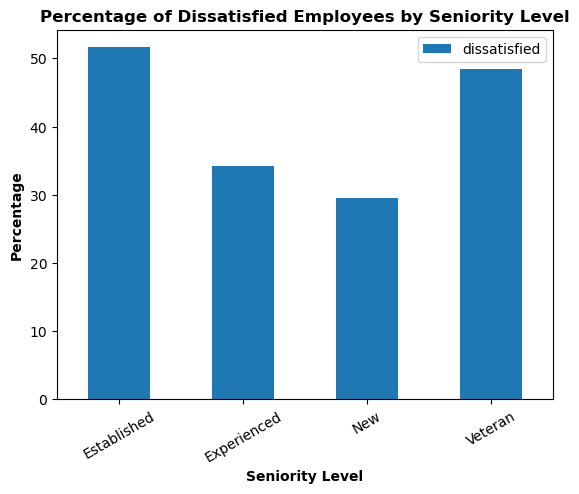

In [36]:
# Plot results with a bar chart
import matplotlib.pyplot as plt
%matplotlib inline

pct.plot(kind='bar', rot=30)
plt.title('Percentage of Dissatisfied Employees by Seniority Level', weight='bold')
plt.xlabel('Seniority Level', weight='bold')
plt.ylabel('Percentage', weight='bold')
plt.show()

The service categories are displayed in alphabetical order, not order of seniority, but we can still glean from the chart that more senior employees — those who have worked at the DETE or TAFE for 7 years or longer — are much more likely than newer employees to resign out of some kind of dissatisfaction. For each of the two senior groups, Established and Veteran, about 50% of their resignations were due to dissatisfaction. On the other hand, about 35% of Experienced resignations were from dissatisfaction, as were less than 30% with the New employee group.

Of course, we would need to handle more of the missing data to finalize these conclusions, but these are our tentative observations. We made the decision to fill in all missing values in the `service_cat` column as `False`, the majority value, because there were only 8 of them — only about 1% of the values — so the effect would be fairly negligible. Another option would have been to exclude the rows from our calculations entirely.

Now let's address the other question. (The project prompt only has us begin to address the first question, but we are going to include the second in this write up.)

### Employee Age and Dissatisfaction

In [33]:
# View raw age values first
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [42]:
# Time to get cleaning
combined_updated['age'] = combined_updated['age'].astype('str')

combined_updated['age'] = combined_updated['age'].str.replace("56 or older", "56")
combined_updated['age'] = combined_updated['age'].str.replace("61 or older", "61")
combined_updated['age'] = combined_updated['age'].str.replace("20 or younger", "20")

combined_updated['age'] = combined_updated['age'].str.replace("  ", "-")
combined_updated['age'] = combined_updated['age'].str.split("-").str.get(-1)

combined_updated['age'] = combined_updated['age'].astype('float')

combined_updated['age'].value_counts(dropna=False).sort_index(ascending=True)

20.0    10
25.0    62
30.0    67
35.0    61
40.0    73
45.0    93
50.0    81
55.0    71
56.0    29
60.0    26
61.0    23
NaN     55
Name: age, dtype: int64

Now that the data are in suitable form, we can proceed with analysis. We're going to create our own age categories on which to aggregate; your mileage may vary.

- Very young: Under 30 years old
- Young: 30-44 years old
- Middle age: 45-59 years old
- Senior: 60+ years old

We will create a function, `map_age()`, that takes in a single parameter, `value`. This function will group all employees into one of our age categories.

In [43]:
def map_age(val):
    if pd.isnull(val):
        return np.nan
    elif float(val) < 30:
        return 'Very Young'
    elif 30 <= float(val) < 45:
        return 'Young'
    elif 45 <= float(val) < 60:
        return 'Middle Age'
    elif float(val) >= 60:
        return 'Senior'
    
combined_updated['age_cat'] = combined_updated['age'].apply(map_age)
combined_updated['age_cat'].value_counts(dropna=False)

Middle Age    274
Young         201
Very Young     72
NaN            55
Senior         49
Name: age_cat, dtype: int64

As we explained earlier, we will have to find a way to fill in the `NaN` values before we continue. In this case, we will fill in the missing values using the `Series.fillna()` method with `ffill` as an argument. This would fill the missing values with the first non-missing value that occurs before it. Of course it is not perfect, but since the missing values make up more than 8% of the rows, that feels too large to drop the rows entirely.

In [44]:
combined_updated['age_cat'].fillna(method='ffill', inplace=True)
combined_updated['age_cat'].value_counts(dropna=False)

Middle Age    303
Young         220
Very Young     77
Senior         51
Name: age_cat, dtype: int64

Below we will aggregate the the data using the `DataFrame.pivottable()` method once again to determine the number and percentage of dissatisfied employees for each age group.

In [46]:
age_pct = combined_updated.pivot_table(values='dissatisfied', index='age_cat', aggfunc=['sum', lambda x: np.mean(x) * 100])
age_pct

,sum,<lambda>
,dissatisfied,dissatisfied
age_cat,,
Middle Age,114,37.623762
Senior,27,52.941176
Very Young,22,28.571429
Young,85,38.636364


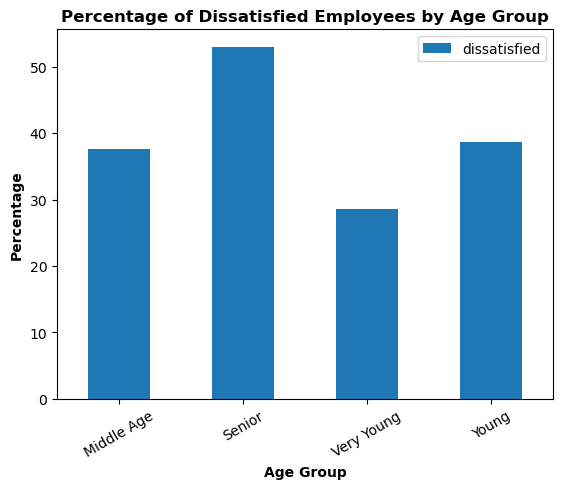

In [48]:
age_pct['<lambda>'].plot(kind='bar', rot=30)
plt.title('Percentage of Dissatisfied Employees by Age Group', weight='bold')
plt.xlabel('Age Group', weight='bold')
plt.ylabel('Percentage', weight='bold')
plt.show()

It appears that Senior employees (60 years and older) have the highest rates of dissatisfaction upon resignation, with about 53% -- more than half. The lowest rate of dissatisfaction upon resignation occurs in Very Young employees (under 30 years), with about 29% reporting dissatisfaction.

## Conclusion

Let's return to the two questions posed at the beginning of the project:

- **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

About 35% of Experienced (3-7 years at company) resignations were from dissatisfaction, as were less than 30% with the New (less than 3 years) employee group. While these rates are not terrible, they still indicate room for improvement.

However, for each of the two senior groups, Established (7-10 years) and Veteran (11 years or more), about 50% of their resignations were due to dissatisfaction. This amounts to half of all resignations in each group -- a remarkable figure.

- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Of the Very Young (under 30 years old) employees who resigned, about 29% did so out of dissatisfaction. This is the lowest rate. Young (30-44 years old) and Middle Age (45-59 years old) employees have similar rates; about 39% and 38% resigned due to dissatisfaction, respectively. However, it is clear that Senior (60+ years old) employees appear to be the most dissatisfied, with this reason making of 53% of their resignations.

With this information, our stakeholders can then make more informed and targeted plans to address the issue.

In this project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization -- not even the final one -- we completed the following tasks:

1. Explored the data and figured out how to prepare it for analysis
2. Corrected some of the missing values
3. Dropped any data not needed for our analysis
4. Renamed our columns
5. Verified the quality of our data
6. Created a new `institute_service` column
7. Cleaned the `Contributing Factors` columns
8. Created a new column, `dissatisfied`, indicating if an employee resigned because they were dissatisfied in some way
9. Combined the data
10. Cleaned the `institute_service` column
11. Handled the missing values in the `dissatisfied` column
12. Aggregated the data

Here are recommendations for further steps we can take with this project:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the `service_cat` and `age_cat` columns again. Reevaluate how many people in each career stage resigned due to dissatisfaction.
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
- As seen in the data, many employees left for reasons other than resignation. 